## Spectral centroid versus duration
The duration of the sound clips ranges from 0.5 sec to 3.65 sec. 

In [18]:
sounds = {}

In [19]:
for zscore in range(13):
    sounds[zscore] = {}
    
    types = ["LFO", "ROS", "SAW"]
    for method in types: 
        for num in range(10):
            name = method + str(num)
            
            sounds[zscore][name] = []

___
** SC, duration, numOnsets, strength onsets **

In [20]:
%matplotlib inline
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import math
from __future__ import division

from scipy import stats

In [21]:
import pandas

In [22]:
import wave
import contextlib
import spectral_centroid as scentroid

In [23]:
from scipy.signal import hilbert

In [24]:
from scipy.io import wavfile
from librosa import onset

### Getting information on all the sounds

Getting the mean spectral centroid of each of the sound files and the length of each sound

In [25]:
cwd = os.getcwd()

In [26]:
sc = []
dur = []

In [27]:
for i in range(13):
    sc_dir = os.path.join(cwd, "sounds", str(i))

    for method in os.listdir(sc_dir):
        sound_method = os.path.join(sc_dir, method)
        
        if method == ".DS_Store":
            os.remove(sound_method)
            continue
            
        for num in range(10):
            sound_file = os.path.join(sound_method, method + str(num))
            
            if sound_file == ".DS_Store" + str(num):
                os.remove(os.path.join(sound_method, ".DS_Store"))
                continue
            
            spec = scentroid.mean_sc_for_file(sound_file)
            with contextlib.closing(wave.open(sound_file,'r')) as f:
                frames = f.getnframes()
                rate = f.getframerate()
                duration = frames / float(rate)

                
            sounds[i][method + str(num)].append(spec)
            sounds[i][method + str(num)].append(duration)
            
            dur.append(duration)
            sc.append(spec)

### Plotting

Plotting spectral centroid versus sound duration

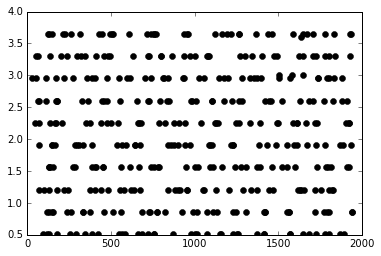

In [28]:
plt.plot(sc, dur, 'ko')

## Spectral centroid versus amplitude envelope

In [29]:
num_onsets = []
onset_strength = []

In [30]:
for i in range(13):
    sc_dir = os.path.join(cwd, "sounds", str(i))

    for method in os.listdir(sc_dir):
        sound_method = os.path.join(sc_dir, method)
        
        if method == ".DS_Store":
            os.remove(sound_method)
            continue
            
        for num in range(10):
            sound_file = os.path.join(sound_method, method + str(num))
            
            if sound_file == ".DS_Store" + str(num):
                os.remove(os.path.join(sound_method, ".DS_Store"))
                continue
            
            audio_ts = wavfile.read(sound_file)

            onset_data = onset.onset_detect(audio_ts[1], audio_ts[0])
            mean_strength = np.mean(onset.onset_strength(audio_ts[1], 
                                                          audio_ts[0]))

            
            
            sounds[i][method + str(num)].append(len(onset_data))
            sounds[i][method + str(num)].append(mean_strength)
            
            num_onsets.append(len(onset_data))
            onset_strength.append(mean_strength)
        

### Plotting

**Spectral centroid versus number of onsets**

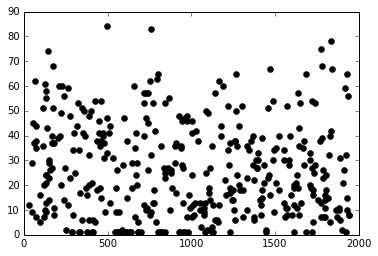

In [31]:
plt.plot(sc, num_onsets, 'ko')

**Spectral centroid versus mean onset strength**

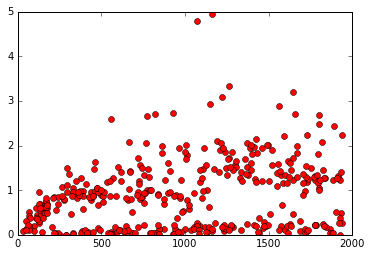

In [32]:
plt.plot(sc, onset_strength, 'ro')

### Covariance matrix

Spectral centroid vs number of onsets vs mean onset strength

In [33]:
cov_data = np.array([sc, dur, num_onsets, onset_strength])

In [34]:
corr = np.corrcoef(cov_data)

In [36]:
corr

array([[  1.00000000e+00,  -7.23000596e-04,  -7.39016953e-02,
          2.58281914e-01],
       [ -7.23000596e-04,   1.00000000e+00,   6.69086174e-01,
         -4.94550201e-02],
       [ -7.39016953e-02,   6.69086174e-01,   1.00000000e+00,
          1.30895496e-01],
       [  2.58281914e-01,  -4.94550201e-02,   1.30895496e-01,
          1.00000000e+00]])

In [35]:
corrdf = pandas.DataFrame(data=corr, index=["sc","duration","numOnsets", "onsetStrength"], 
                columns=["sc","duration","numOnsets", "onsetStrength"])

In [37]:
pandas.DataFrame.to_csv(corrdf, "soundCorr.csv")

___

### Exporting JSON of sound parameters

In [ ]:
import json

In [ ]:
soundParameters = os.path.join(os.path.dirname(cwd), "DATA", "soundParameters.json")

In [ ]:
with open(soundParameters, 'w') as f:
            json.dump(sounds, f, sort_keys=True, indent=4)

In [ ]:
sc = {}

In [ ]:
for i in range(13): 
    sc[i] = {}

In [ ]:
for i in range(13):
    sc_dir = os.path.join(cwd, "sounds", str(i))
    print i

    for method in os.listdir(sc_dir):
        sound_method = os.path.join(sc_dir, method)
        
        if method == ".DS_Store":
            os.remove(sound_method)
            continue
            
        for num in range(10):
            sound_file = os.path.join(sound_method, method + str(num))
            
            if sound_file == ".DS_Store" + str(num):
                os.remove(os.path.join(sound_method, ".DS_Store"))
                continue
            
            spec = scentroid.mean_sc_for_file(sound_file)
                
            sc[i][method + str(num)] = spec

In [ ]:
soundSC = os.path.join(os.path.dirname(cwd), "DATA", "soundSC.json")

In [ ]:
with open(soundSC, 'w') as f:
            json.dump(sc, f, sort_keys=True, indent=4)